In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import spacy
from operator import itemgetter
import numpy as np

nlp = spacy.load('en_core_web_sm')

In [2]:
f = open('../Data/furniture_cleaned-tagged_manuel.json',) 

In [3]:
data = json.load(f)

In [4]:
#CALCULATING AMBIGUITY SCORES IN IS ADJECTIVES
ambiguity = {}
for element in data[-1]:
    if element[3] == 'a':
        score = 0
    else:
        score = 1
    ambiguity[element[0]] = [int(element[2]), score]
    

In [5]:
#CALCULATING AMBIGUITY SCORES
ambigous_author = 0
total_author = 0
for article in range(len(data)-2):
    for adj in data[article]['adj_quotes']:
        if adj in ambiguity:
            if ambiguity[adj][0] != 0:
                total_author += 1
                ambigous_author += ambiguity[adj][1]
                
print('Ambiguity in author: ', ambigous_author/total_author)

ambigous_reporter = 0
total_reporter = 0
for article in range(len(data)-2):
    for adj in data[article]['adj_no_quotes']:
        if adj in ambiguity:
            if ambiguity[adj][0] != 0:
                total_reporter += 1
                ambigous_reporter += ambiguity[adj][1]

                
print('Ambiguity in reporter: ', ambigous_reporter/total_reporter)
            

Ambiguity in author:  0.7414721723518851
Ambiguity in reporter:  0.6898798615353289


In [6]:
#Find all adjectives used by authors and reporters that also have an ambiguity score and are relevant
all_author_adjectives = {}
all_reporter_adjectives = {}
for article in range(len(data)-2):
    for adj in data[article]['adj_quotes']:
        if adj in ambiguity and ambiguity[adj][0] != 0:
            if adj not in all_author_adjectives:
                all_author_adjectives[adj] = 1
            else:
                all_author_adjectives[adj] += 1
                
    for adj in data[article]['adj_no_quotes']:
        if adj in ambiguity and ambiguity[adj][0] != 0:
            if adj not in all_reporter_adjectives:
                all_reporter_adjectives[adj] = 1
            else:
                all_reporter_adjectives[adj] += 1
        

In [7]:
#FINDING AMBIGUITY GRADIENT FLOW IN USAGE OF ADJECTIVES BETWEEN REPORTERS AND AUTHORS
total_author = sum(list(all_author_adjectives.values()))#total adjectives used by authors
total_reporter = sum(list(all_reporter_adjectives.values()))#total adjectives used by reporters
total = total_author + total_reporter

common_adjectives = {}
for adjective in ambiguity.keys():
    if (adjective in all_reporter_adjectives) and (adjective in all_author_adjectives):
        common_adjectives[adjective] = all_reporter_adjectives[adjective]/total_reporter - all_author_adjectives[adjective]/total_author
        
'''
    common_adjectives[adjective] = all_reporter_adjectives[adjective]/total_reporter - all_author_adjectives[adjective]/total_author
    This for adjectives both used by reporters and authors. For those adjectives:
    
    term 1 : all_reporter_adjectives[adjective]/total_reporter
    This is the normalized ratio of how frequent an adjective was in reporter speech
    
    term 2 : all_author_adjectives[adjective]/total_author
    This is the normalized ratio of how frequent an adjective was in author speech
    
    The difference, if positive, shows that the adjective was more frequently used by the reporter. 
    If negative, shows that the adjective was more frequently used by author
 

'''
        
d = common_adjectives
sorted_common_adjectives = sorted(d.items(), key=itemgetter(1), reverse = True)

In [8]:
def calculate_ambiguity_score(sorted_common_adjectives, ambiguity, window_size = 5) :
    ambiguity_flow = []
    
    for i in range(len(sorted_common_adjectives) - window_size +1):
        temp_score = 0
        for adj, score in sorted_common_adjectives[i:i+window_size]:
            temp_score += ambiguity[adj][1]
        ambiguity_flow.append(temp_score/window_size)
        
    return ambiguity_flow

In [19]:
ambiguity_flow = calculate_ambiguity_score(sorted_common_adjectives, ambiguity, window_size = 30)

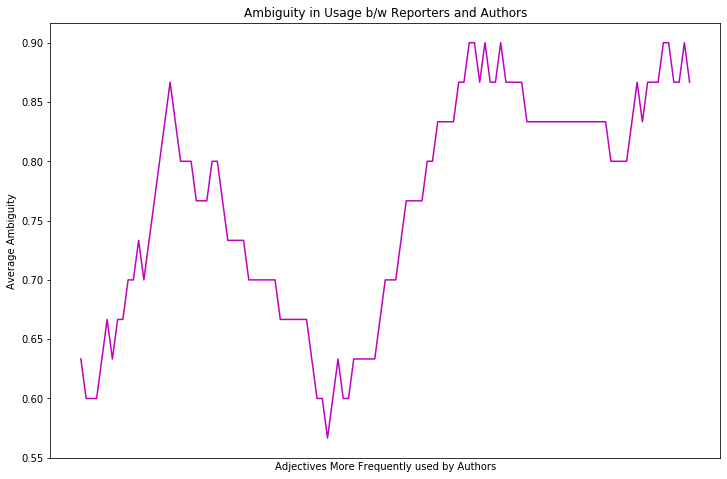

In [45]:
plt.figure(figsize=(12,8))
plt.plot(ambiguity_flow, 'm-')
plt.xlabel('Adjectives More Frequently used by Authors')
plt.ylabel('Average Ambiguity')
plt.title('Ambiguity in Usage b/w Reporters and Authors')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])
plt.savefig('furniture_flow.png')
plt.savefig('furniture_flow.jpg')

In [43]:
#words more frequently used by reporters
words = []
for word,_ in sorted_common_adjectives[0:10]:
    words.append(word)
    
print(words)

['danish', 'more', 'fair', 'modular', 'circular', 'spanish', 'minimal', 'shaped', 'pale', 'young']


In [42]:
#words more frequently used by authors
words = []
for word,_ in sorted_common_adjectives[-11:-1]:
    words.append(word)
    
print(words)

['wonderful', 'massive', 'ideal', 'useful', 'honest', 'exciting', 'domestic', 'whole', 'functional', 'comfortable']
